In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [ ]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [ ]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

<Axes: >

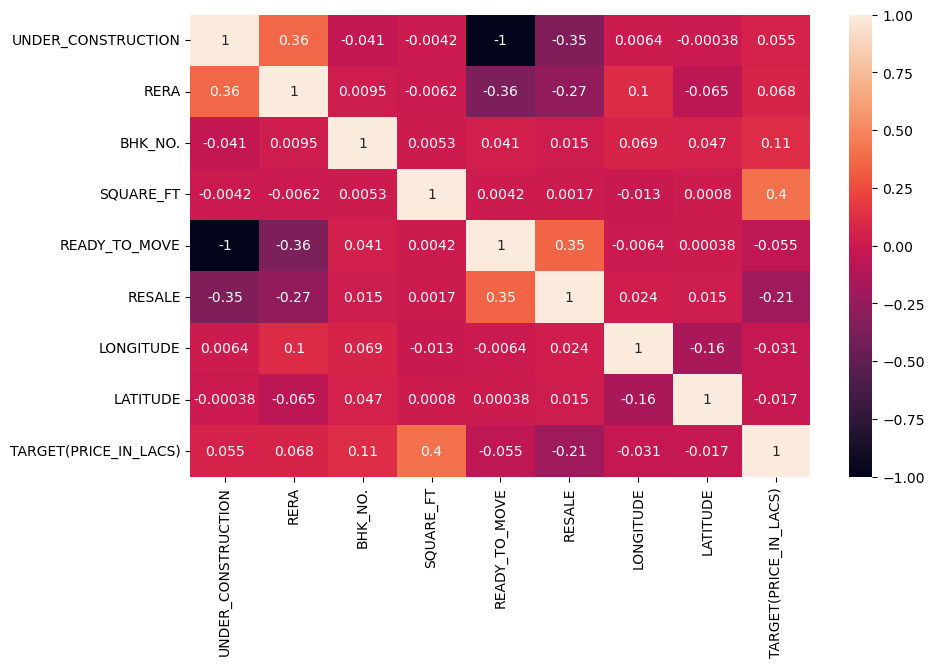

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(include = np.number).corr(),annot = True)

<Axes: xlabel='SQUARE_FT', ylabel='Count'>

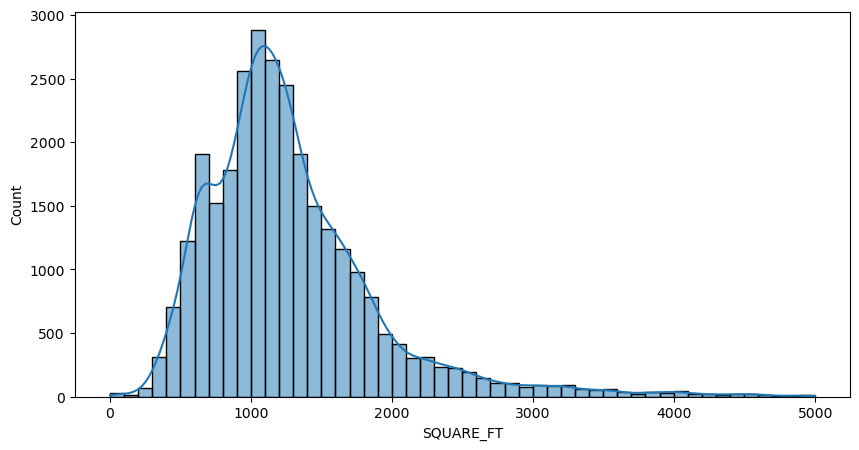

In [ ]:
filtered_data = data[data["SQUARE_FT"]<5000]
plt.figure(figsize=(10,5))
sns.histplot(filtered_data['SQUARE_FT'],bins = 50,kde=True)

<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Count'>

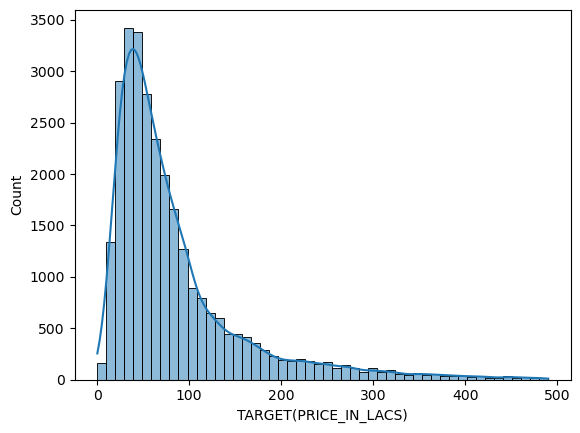

In [ ]:
filtered_price = data[data["TARGET(PRICE_IN_LACS)"]<500]
sns.histplot(filtered_price["TARGET(PRICE_IN_LACS)"],bins = 50,kde=True)

In [ ]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


<Axes: xlabel='BHK_NO.', ylabel='count'>

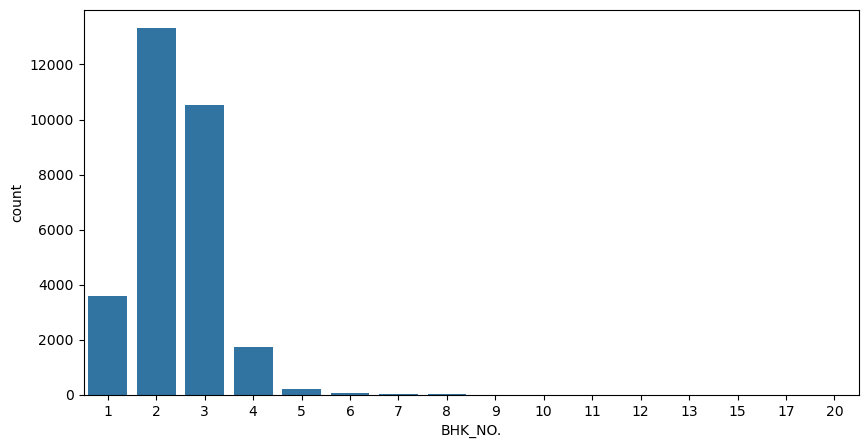

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x="BHK_NO.",data = data)

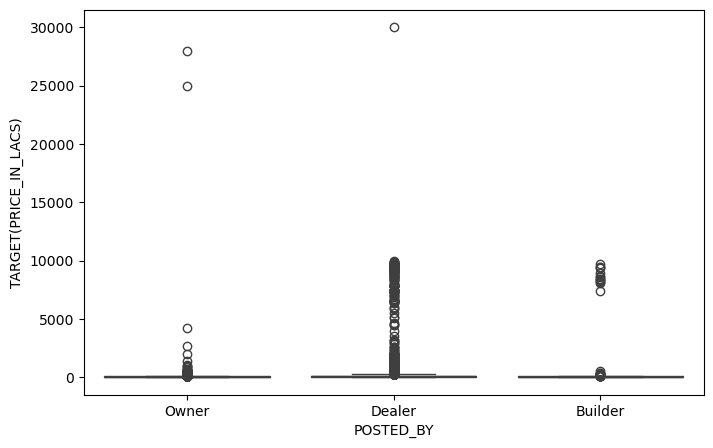

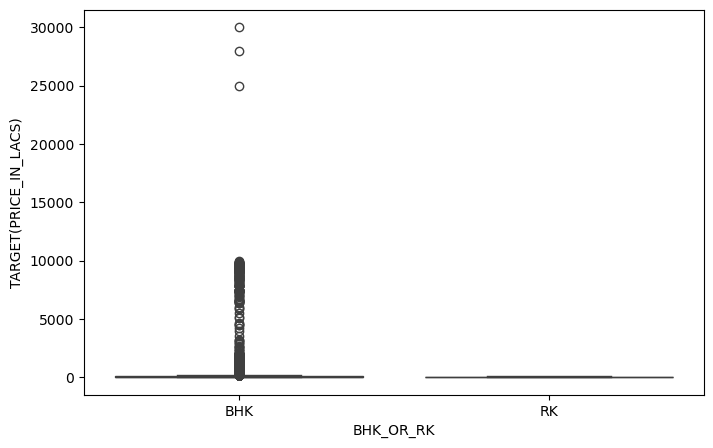

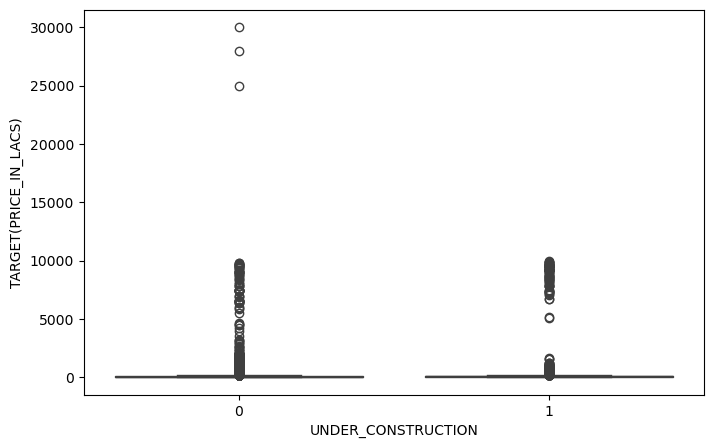

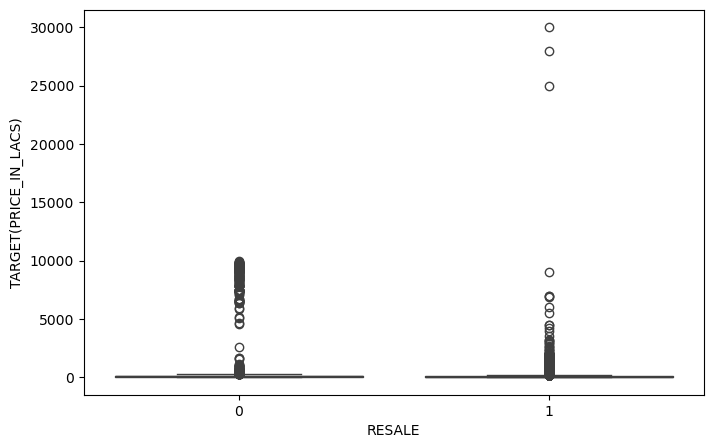

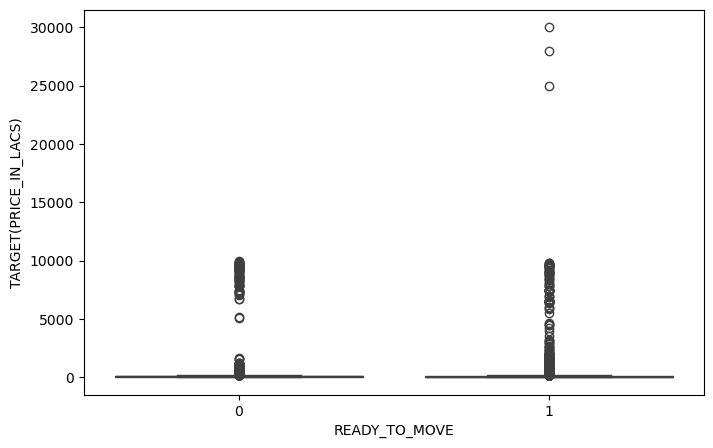

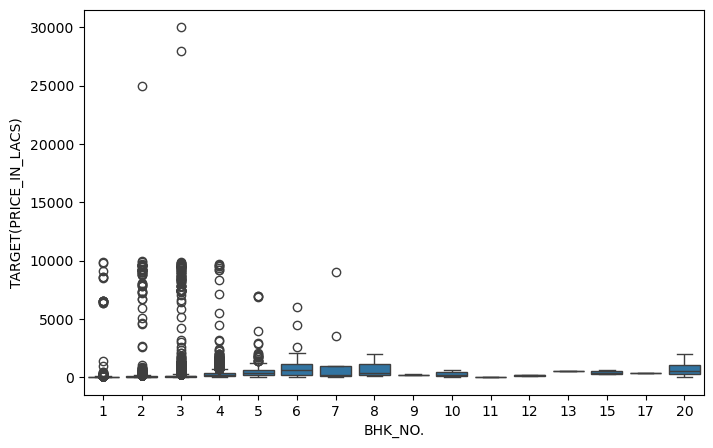

In [ ]:
categorical_cols = ['POSTED_BY','BHK_OR_RK','UNDER_CONSTRUCTION','RESALE','READY_TO_MOVE','BHK_NO.']
for i in categorical_cols:
    plt.figure(figsize = (8,5))
    sns.boxplot(data = data,x=i,y="TARGET(PRICE_IN_LACS)")
    plt.show()

<Axes: xlabel='BHK_NO.', ylabel='TARGET(PRICE_IN_LACS)'>

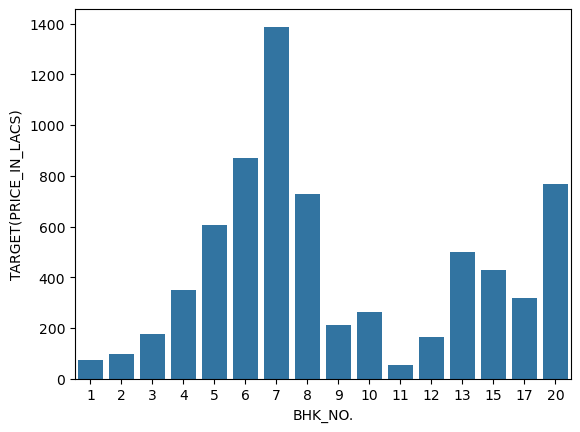

In [ ]:
avg_price = data.groupby('BHK_NO.')["TARGET(PRICE_IN_LACS)"].mean().reset_index()
sns.barplot(data = avg_price,x= "BHK_NO.",y = "TARGET(PRICE_IN_LACS)")

In [ ]:
le=LabelEncoder()
data["POSTED_BY"]=le.fit_transform(data["POSTED_BY"])
data["BHK_OR_RK"]=le.fit_transform(data["BHK_OR_RK"])

data.drop(columns=["ADDRESS"],inplace=True)

In [ ]:
X = data.drop(columns = ["TARGET(PRICE_IN_LACS)"])
y = data["TARGET(PRICE_IN_LACS)"] 
X
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [ ]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([140.70742068, 135.64545389,  51.58200004, ..., 294.72415747,
        57.11803516,  50.65319765])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
r2 = r2_score(y_test,y_pred)
r2

0.31384247465306525

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

552.2054321881454

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1- (1-r2)*((n-1)/(n-p-1))
adjusted_r2

0.3131356786854643

In [ ]:
import pickle 

In [ ]:
with open("Model.pkl",'wb') as fs:
    pickle.dump(model, fs)

In [ ]:
with open("Scaler.pkl",'wb') as fs:
    pickle.dump(scaler,fs) 